In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Show first 5 rows
print(X.head())

# Check for missing values
print("\nMissing values:\n", X.isnull().sum())

# Class distribution
print("\nTarget class distribution:\n", y.value_counts())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn.predict(X_test_scaled)


In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9722222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36


Confusion Matrix:
 [[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


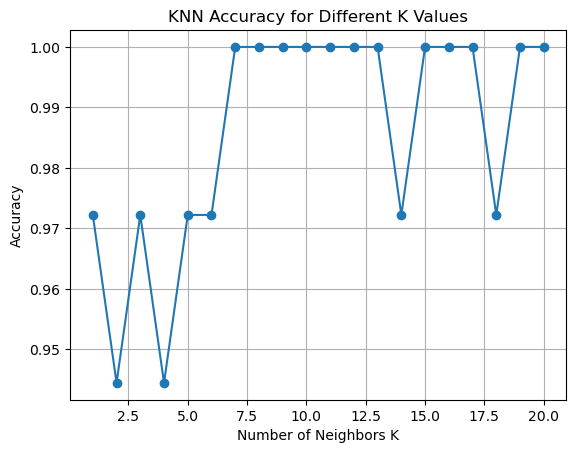

In [9]:
import matplotlib.pyplot as plt

# Try different values of K
scores = []
k_range = range(1, 21)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    scores.append(model.score(X_test_scaled, y_test))

# Plot accuracy vs k
plt.plot(k_range, scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.grid(True)
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different distance metrics
knn_euc = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_man = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

knn_euc.fit(X_train, y_train)
knn_man.fit(X_train, y_train)

print("Euclidean Accuracy:", knn_euc.score(X_test, y_test))
print("Manhattan Accuracy:", knn_man.score(X_test, y_test))


Euclidean Accuracy: 0.8055555555555556
Manhattan Accuracy: 0.8333333333333334
